# Exploratory Data Analysis

Here we will be exploring ad data from the New York Times home page. Our goal is to come up with an important variable to track over time in order to evaluate the performance of the home page.

To do this we calculate the average click-through-rate (CTR) which is the average number of clicks per impression. We then track this for different age groups. 

In [1]:
# import our tools
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# import the data from the source and create a data frame
dataSource = "http://stat.columbia.edu/~rachel/datasets/nyt1.csv"
rawData = pd.DataFrame.from_csv(dataSource).reset_index()

In [3]:
# let's learn a bit about our data
# print(rawData.dtypes)
print(rawData.head())
rawData.describe()

   Age  Gender  Impressions  Clicks  Signed_In
0   36       0            3       0          1
1   73       1            3       0          1
2   30       0            3       0          1
3   49       1            3       0          1
4   47       1           11       0          1


,Age,Gender,Impressions,Clicks,Signed_In
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000
mean,29.482551,0.367037,5.007316,0.092594,0.700930
std,23.607034,0.481997,2.239349,0.309973,0.457851
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000
50%,31.000000,0.000000,5.000000,0.000000,1.000000
75%,48.000000,1.000000,6.000000,0.000000,1.000000
max,108.000000,1.000000,20.000000,4.000000,1.000000


Let's break this down into age groups. I will create a list of the age groups and then construct a list of data frames.

In [4]:
# list with the age groups
ageGroups = [[1,18],[19,24],[25,34],[35,44],[45,54],[55,64],[65,200]];
def selectAge(inData, a1, a2):
    """Returns dataframe between ages a1 and a2"""
    return rawData[(inData['Age']>=a1) & (inData['Age']<=a2)]

dataByAge = [[i,selectAge(rawData,i[0],i[1])] for i in ageGroups];
#dataByAge = [rawData[(rawData['Age']<1) & (rawData['Age']>18)] for i in ageGroups];
#dataByAge = [i for i in ageGroups];
dataByAge[1][1].head()


,Age,Gender,Impressions,Clicks,Signed_In
11,21,0,3,0,1
25,19,1,4,0,1
26,19,0,3,0,1
29,21,1,5,0,1
30,23,0,4,0,1


So the first element of our new array has only  ages between 1 and 18. Lets see who is reading the most of the ages.

In [5]:
for dat in dataByAge:
    print("Age range:{} and count: {}".format(dat[0],dat[1]["Signed_In"].count()))

Age range:[1, 18] and count: 19252
Age range:[19, 24] and count: 35270
Age range:[25, 34] and count: 58174
Age range:[35, 44] and count: 70860
Age range:[45, 54] and count: 64288
Age range:[55, 64] and count: 44738
Age range:[65, 200] and count: 28753


Lets plot the number of impressions for each age

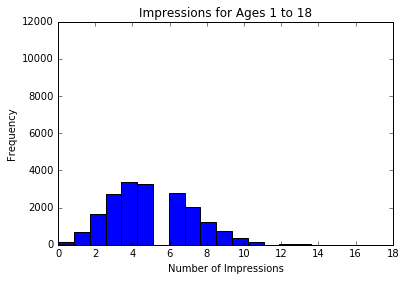

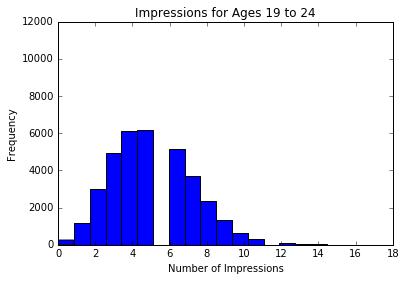

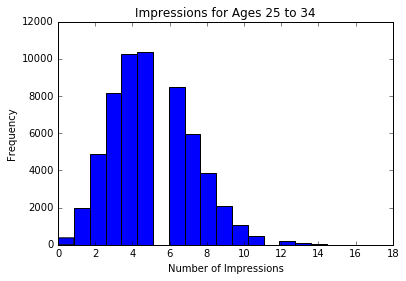

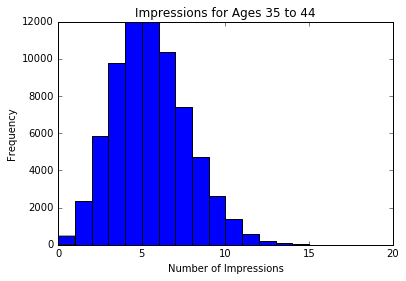

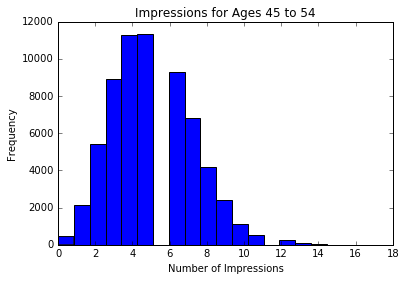

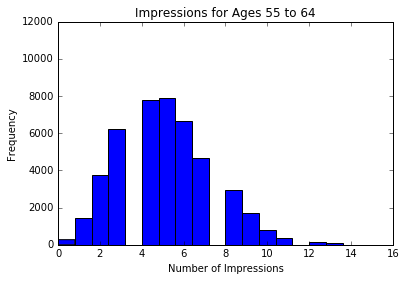

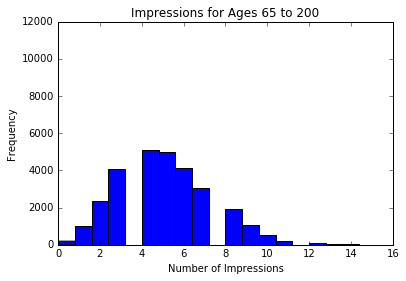

In [6]:
def getPlot(inData,ages,prop):
    """Return a plot of the hist given a dataframe and a property prop"""
    impr=inData[prop]
    plt.figure();
    plt.xlabel("Number of {}".format(prop))
    plt.title("{} for Ages {} to {}".format(prop,ages[0],ages[1]))
    plt.ylim(0,1.2*10**4)
    return impr.plot.hist(bins=20)

for i in dataByAge:
    #print("Age range:",i[0])
    getPlot(i[1],i[0],"Impressions")

Looks like we have may readers in the 35-44 range. Let's look at the CTR click-through-rate that is defined as the number of clicks per impression.

In [7]:
# add ctr to our data by age dataframe 
# warning here we will /0 but will remove with a call to dropna

pd.options.mode.chained_assignment = None
tmp = []
for dat in dataByAge:
    newDF=dat[1]
    newDF['CTR']=dat[1]['Clicks']/dat[1]['Impressions']
    tmp.append([dat[0],newDF.dropna()])

dataByAge=tmp

Ok now we have our click-through-rate lets do some analysis. 

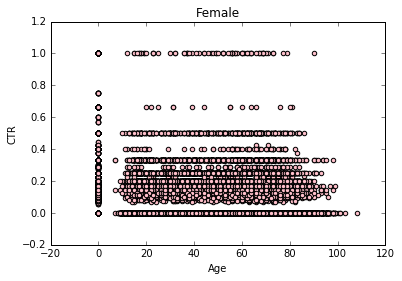

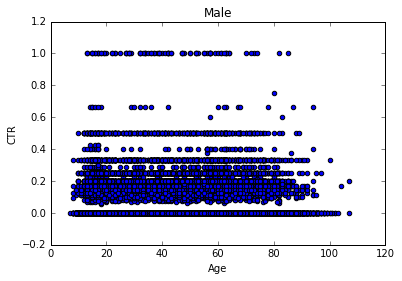

In [8]:
# lets combine the data now that is has been cleaned.
tmp = []
for dat in dataByAge:
    tmp.append(dat[1])
dataAllAges = pd.concat(tmp)
tmp = dataByAge[1][1]
tmp = dataAllAges
tmp = rawData.dropna()
tmp['CTR']=tmp['Clicks']/tmp['Impressions']


tmp[tmp['Gender']==0].plot.scatter(x='Age',y='CTR',c='Pink',title="Female")
tmp[tmp['Gender']==1].plot.scatter(x='Age',y='CTR',c='Blue',title="Male")

Probably the most striking difference between these two graphs is the difference in the number of people who are 0 years old. We will drop these data points from our average CTR report.

Most likely what we will want to track over time is the average CTR per age group.

In [37]:
print(" Click-Through-Rate")
print("Ages\tMean\tSTD")
for dat in dataByAge:
    print("{}-{}\t{}\t{}".format(dat[0][0],dat[0][1], round(dat[1][dat[1]['Age']>0]['CTR'].mean(),4), round(dat[1]['CTR'].std(),4)))

 Click-Through-Rate
Ages	Mean	STD
1-18	0.0266	0.0828
19-24	0.0097	0.0504
25-34	0.0101	0.0509
35-44	0.0103	0.0511
45-54	0.01	0.05
55-64	0.0203	0.0719
65-200	0.0298	0.084
